# Transfer learning para clasificación de razas

## Introducción

Anteriormente se realizó un clasificador de perros y gatos, se entrenaron diversos modelos basados en la arquitectura VGG, sin embargo, llevar a cabo la mejora de éstos modelos suele ser una tarea muy exhaustiva, ya sea que se adopte cualquiera de los siguientes paradigmas

* Baby Panda: utilizar un solo modelo e ir optimizándolo hasta alcanzar el desempeño deseado.
* Caviar: crear una gran variedad de modelos, medir su desempeño y acotar los que han presentado mejor desempeño.

Cualquiera de estos dos paradigmas que se adopte (en especial la del Caviar), el costo computacional suele ser muy alto para modelos más complejos.

## Aprendizaje transferido

El aprendizaje transferido es una técnica muy útil para llevar a cabo proyectos más complejos ya que disminuye mucho la carga del entrenamiento del modelo, y por lo tanto, el costo computacional. Ésta técnica consiste en utilizar un modelo preentrenado para ser utilizado, alterado o complementado para aplicaciones que suelen ser más complejas que la habituales.

### [TensorFlow Hub](https://www.tensorflow.org/hub?hl=es-419)

TensorFlow Hub es un sitio que contiene una grna variedad de modelos que han sido preentrenados con diferentes bases de datos y propósitos.

![TensorFlow Hub](media/tensorflow_hub.JPG)

## Clasificador de Gatos y Perros

Este proyecto se enfoca en la clasificación de perros y gatos por su tipo de raza, el cual da seguimiento al proyecto anterior que consistía simplemente en saber si era gato o perro.

Ahora la siguiente Red Neural da el paso siguiente que es clasificar los perros y gatos por su tipo de raza, lo cual tiene aplicaciones inmediatas al trabajar con una interfaz digital en el ámbito de la veterinaria o comercio de mascotas.

### [Red Neuronal ResNet50](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/ResNet50)

Para llevar a cabo la tarea antes mencionada se utilizará la red neuronal ResNet50, la cual ha sido preentrenada para clasificar diversos objetos.

![Red Neuronal ResNet50](media/keras_resnet50.JPG)

La precisión de este modelo puede resumirse en la siguiente imagen.

![Precisión ResNet50](media/redes_disponibles.jpg)


## Importando bibliotecas a utilizar

In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

## Creando el modelo ResNet50

Durante este proceso se cargan los pesos asociados a la red neuronal listo para clasificar.

In [2]:
model = ResNet50(weights='imagenet')

## Función evaluar imágenes

La siguiente función lee una imagen y la clasifica.

In [7]:
def evaluate(img_fname):
    """Realiza la clasificación de razas de gatos y perros mediante la red neuronal RedNet50.

    Args:
        img_fname (imagen): imagen en formato .jpg (de preferencia)

    Returns:
        lista (list) : Retorna una lista con el identificador, raza y la probabilidad asociada brindada por la red neural.
    """
    img = image.load_img(img_fname, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    # print the probability and category name for the 5 categories
    # with highest probability:
    # print('Predicted:', decode_predictions(preds, top=5)[0])
    plt.imshow(img)
    lista = list(decode_predictions(preds)[0][0])
    
    plt.title("Raza: " + lista[1])
    plt.xticks([])
    plt.yticks([])
    return lista

## Loop Clasificador de Imágenes

* Itera aleatoriamente 10 imágenes de nuestro set de prueba y las clasifica mediante la red neuronal.

* Retorna una lista con las propiedades asociadas a cada imagen (id, Raza, Proabilidad).

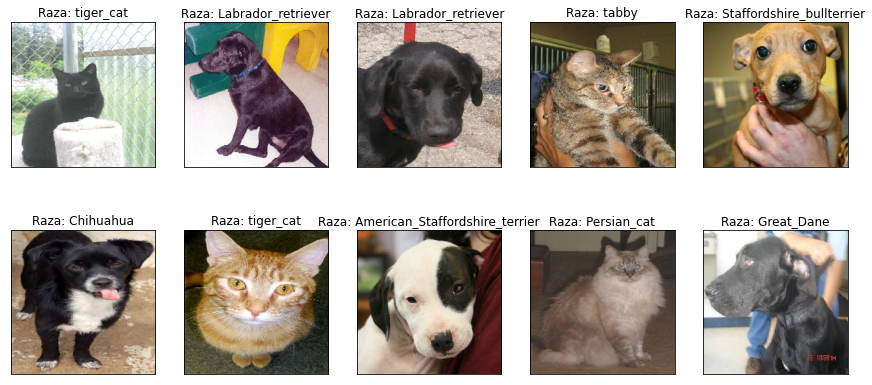

In [10]:
# Obtiene el índice aleatorio de 10 imágenes
rand_idx = [random.randint(0,12500) for i in range(10)]
# Define una lista vacia
df_pred = []
# Configura el canva de la imagen
plt.figure(figsize=(15,7))
# Iterador for
for i in range(10):
    plt.subplot(2,5,i+1)
    # Agrega la lista retornada por la función evaluate()
    df_pred.append(evaluate("test\\" + str(rand_idx[i]) + ".jpg"))

## Dataframe de razas y probabilidad

El siguiente dataframe muestra el resultado obtenido en el loop anterior con su probabilidad asociada.

In [11]:
df_pred = pd.DataFrame(df_pred, columns=["Id","Raza","Probabilidad"])
df_pred.set_index("Id")

,Raza,Probabilidad
Id,,
n02123159,tiger_cat,0.230304
n02099712,Labrador_retriever,0.532673
n02099712,Labrador_retriever,0.949797
n02123045,tabby,0.572944
n02093256,Staffordshire_bullterrier,0.541978
n02085620,Chihuahua,0.431440
n02123159,tiger_cat,0.548411
n02093428,American_Staffordshire_terrier,0.924008
n02123394,Persian_cat,0.742527


## Conclusión

El transfer learning es una herramienta bastante útil para diseñar redes con propósitos más complejos, además nos ahorra mucho el proceso de optimización y el costo computacional necesario para diseñar una red neural desde cero.

Durante este proceso se llevó a cabo una red para clasificar por raza, sin embargo, el sistema no es perfecto, pero es un gran paso en el proceso de perfeccionamiento de la red.